# Midterm

CS529

Adrien Clay

Refat Mishuk

Christopher Jarek

Thomas Hynes


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style(style='darkgrid')
RANDOM_STATE = 42
from generate_data import generate_data
import numpy as np
from generate_data_q4 import q4_a
from generate_data_q4 import q4_b

## 1. Tree data structure

`regression_tree.py` contains the devised model, `RegressionTree`

Data in the form of parent-child relationships can be represented and arranged using the hierarchical tree data structure.

1. Left child: Contains samples that satisfy $X[\text {feature}]\leq \text{threshold}$

2. Right child: Contains samples that satisfy $X[\text {feature}]\gt \text{threshold}$

3. Leaf Nodes: The terminal nodes that contain the predicted value, the mean of the target variable in that region.

### Root Node
The root node is the node at the top of a tree.

### Split
Splitting involves dividing a node into two or more child nodes based on a chosen dimension and a value.

### Mathematical Formulation of Split Selection
$$ 
SSE = \sum_{x_i \in X_{\text{left}}}{(y_i - \bar {y}_{\text{left}})}^2 + \sum_{x_i \in X_{\text{right}}}{(y_i - \bar {y}_{\text{right}})}^2 
$$
Function FindBestSplit(X, y):
1. Initialize Best_SSE = Infinity
2. For each feature f in X:
    - Get unique values in feature f as candidate thresholds
    - For each threshold t in candidate thresholds:
        - Partition data into Left and Right based on (f, t)
        - Compute SSE for the split
        - If SSE < Best_SSE:
            - Update Best_Split = (f, t)
            - Update Best_SSE

3. Return Best_Split

## 2. Testing RegressionTree on Generated Data

1. No limit
2. 1/2 and 3/4 of the obtained height
3. With leaf size limitations

All code for this question pertaining to evaluation can be found in `q2.py`, which was not included here for the purpose of keeping the report clean.

Overall, it appears that the mean absolute error of the tree with 8 samples per leaf was the highest, 3/4 height tree was the lowest, potentially rivaling the tree with no limit

However, the tree with no limit took the longest to construct while the tree with 8 samples per leaf took the least amount of time.

In [5]:
from q2 import evaluate_q2 # import code for question 2

In [6]:
results = evaluate_q2(RANDOM_STATE)
df = pd.DataFrame(results)
df

,Model,Time,MAE,Height
0,No Limit Regression,0.064417,0.045141,16
1,1/2 Of Obtained Height,0.046500,0.049517,9
2,3/4 Of Obtained Height,0.046563,0.045141,13
3,2 Samples Per Leaf,0.033394,0.054258,13
4,4 Samples Per Leaf,0.025251,0.067146,10
5,8 Samples Per Leaf,0.016247,0.097600,7


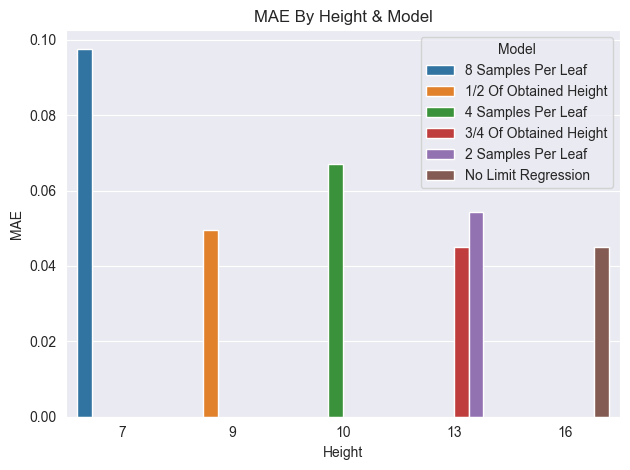

In [7]:
sns.barplot(data=df.sort_values(by='Height'), x='Height', y='MAE', hue='Model')
plt.title('MAE By Height & Model')
plt.tight_layout()

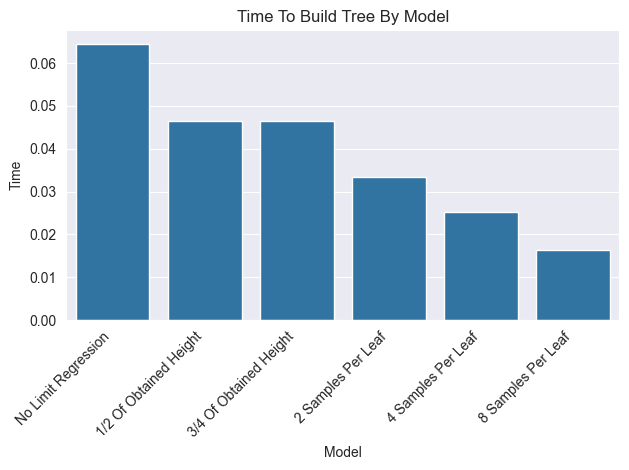

In [8]:
sns.barplot(data=df, x='Model', y='Time')
plt.xticks(rotation=45, ha='right')
plt.title("Time To Build Tree By Model")
plt.tight_layout()

## 3. Regression Tree Method for Multi-Dimensional Dynamical System

Overall, it appears that the regression tree is able to mostly correctly predict the next state in the system.

The data for this question is generated by `generate_data.py`, which produces values for the equation provided in the midterm instructions. 

Generate data returns a dataframe in the following form:

| xk  | vk   | xk+1 | vk+1 |
|-----|------|------|------|
| 1.0 | 10   | 2.0  | 10.0 |
| 2.0 | 10   | 3.0  | 10.0 |
| 3.0 | 10   | 4.0  | 10.0 |

Using this data, the model is trained with $(x_k, v_k)$ as features and $(x_{k+1}, v_{k+1})$ as targets.

The result is that the tree seems to following the correct pattern until it jumps ahead of itself and gains more than it should on each iteration, predicting more than one increment per state transition.

In [9]:
from regression_tree import RegressionTree
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

Mean Absolute Error:
0.625


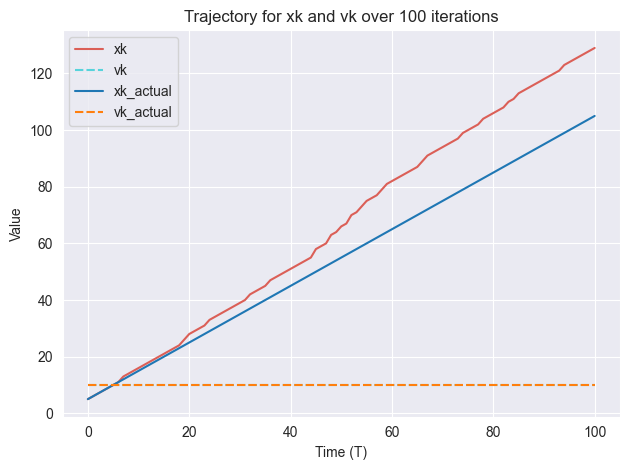

In [10]:
# Generate the data
df = generate_data(1000, add_noise=False)

# Select columns
feature_cols = ['xk', 'vk']
target_cols = ['xk+1', 'vk+1']
reg = RegressionTree()

# Split and train
X = df[feature_cols].values
y = df[target_cols].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=RANDOM_STATE, shuffle=True)
reg.fit(X_train, y_train)

print("Mean Absolute Error:")
print(mean_absolute_error(y_test, reg.predict(X_test)))

# Starting point will be (5,10)
start = 5
iterations = 100
state = [start, 10]
trajectory = [state.copy()]

# for each iteration, take the output prediction and use it as the next state
for i in range(iterations):
    inputs = [trajectory[-1]]
    pred = reg.predict(inputs)[0]
    xk = np.float64(pred[0])
    vk = np.float64(pred[1])
    next = np.array([xk, vk])
    trajectory.append(next)
result = pd.DataFrame(trajectory, columns=['xk', 'vk'])
df.rename(columns={ 'xk': 'xk_actual', 'vk': 'vk_actual'}, inplace=True)
actual = df.iloc[(start - 1):(start + iterations)].reset_index(drop=True)
sns.lineplot(data=result, palette="hls")
sns.lineplot(data=actual[['xk_actual', 'vk_actual']])
plt.title(f"Trajectory for xk and vk over {iterations} iterations")
plt.xlabel("Time (T)")
plt.ylabel("Value")
plt.tight_layout()

\pagebreak

## 4. Testing Implementation of regression tree state prediction method

In the below section we use methods in the generate_data_q4.py file to generate data for each case study. The first section uses the following recurrance relations:

$x^1_n = 0.9x^1_k - 0.2x^2_k$

$x^2_n = 0.2x^1_k + 0.9x^2_k$

Our goal is to train our regression tree on a portion of these relations and to use it to predict the curve.

Mean Absolute Error:
0.18714844767265099


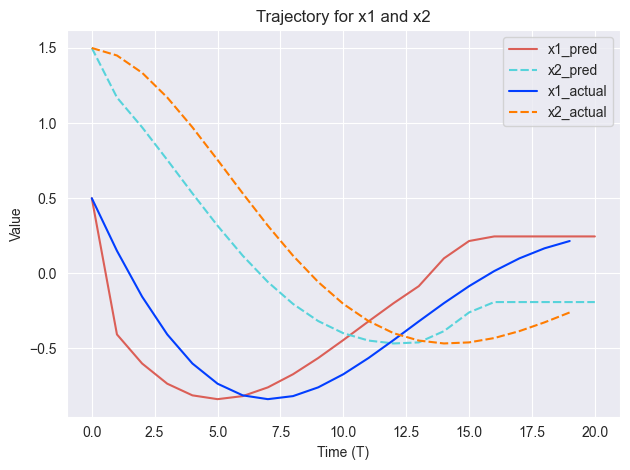

In [20]:
t = 20
x1 = 0.5
x2 = 1.5

df = q4_a(t, x1, x2)
feature_cols = ['x1', 'x2']
target_cols = ['x1_next', 'x2_next']
reg = RegressionTree()

X = df[feature_cols].values
y = df[target_cols].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=RANDOM_STATE, shuffle=True)
reg.fit(X_train, y_train)

print("Mean Absolute Error:")
print(mean_absolute_error(y_test, reg.predict(X_test)))

predictions = [[x1, x2]]

for i in range(t):
    inputs = [predictions[-1]]
    pred = reg.predict(inputs)[0]
    next = np.array([pred[0], pred[1]])
    predictions.append(next)

predicted_result = pd.DataFrame(predictions, columns=['x1', 'x2'])

predicted_result = predicted_result.rename(columns={'x1':'x1_pred', 'x2':'x2_pred'})
actual_result = df.rename(columns={'x1':'x1_actual', 'x2':'x2_actual'})

sns.lineplot(data=predicted_result[['x1_pred', 'x2_pred']], palette="hls")
sns.lineplot(data=actual_result[['x1_actual', 'x2_actual']], palette='bright')
plt.title("Trajectory for x1 and x2")
plt.xlabel("Time (T)")
plt.ylabel("Value")
plt.tight_layout()

Above is the result of applying our regression tree to try to predict the recurrence relations and the following starting conditions:

$x^1_0 = 0.5, x^2_0 = 1.5$

We can see that our prediction isn't perfect, and has an average error of 0.187.

\pagebreak

### 4.1 Testing implementation using `func`
The following section was made using the following provided function:

```python
def func(x):
    z = 0
    for _ in range(20):
        if x > 1:
            x = 0
        else:
            x = x + 0.2
        z = z + x
```
Implementing it in generate_data_q4.py, we modified it so that it would have x_n and z_n for use as target variables and can output a dataframe containing the values of x and z at each step.

The below implementation uses our regression tree model to predict x and z from training it on a portion of the data.

Mean Absolute Error:
0.525


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

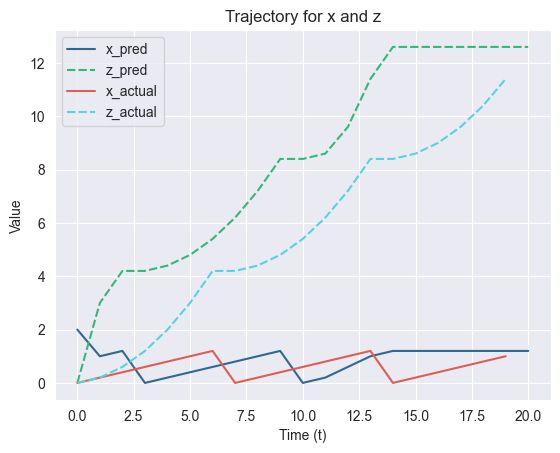

In [21]:
x = 2
z = 0
df = q4_b(x)
feature_cols = ['x', 'z']
target_cols = ['x_next', 'z_next']
reg = RegressionTree()

X = df[feature_cols].values
y = df[target_cols].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=RANDOM_STATE, shuffle=True)
reg.fit(X_train, y_train)

print("Mean Absolute Error:")
print(mean_absolute_error(y_test, reg.predict(X_test)))

trajectory = [[x, z]]

for i in range(20):
    inputs = [trajectory[-1]]
    pred = reg.predict(inputs)[0]
    next = np.array([pred[0], pred[1]])
    trajectory.append(next)

predicted_result = pd.DataFrame(trajectory, columns=['x', 'z'])

predicted_result = predicted_result.rename(columns={'x':'x_pred', 'z':'z_pred'})
actual_result = df.rename(columns={'x':'x_actual', 'z':'z_actual'})

sns.lineplot(data=predicted_result, palette='viridis')
sns.lineplot(data=actual_result[['x_actual', 'z_actual']], palette="hls")
plt.title("Trajectory for x and z")
plt.xlabel("Time (t)")
plt.ylabel("Value")
plt.tight_layout

The above graph displays a comparison between the actual computed values of x and z versus the values predicted by our regression tree. We can see the average error was 0.525 but is typically greater for z. This is likely because x was constrained to be between 0 and 1, while z followed a less predictable and unbounded pattern.

Interestingly in both implementations discussed in part 4, it appears that the predicted values would be more accurate if shifted to the right on the x-axis. This may be due to an error in the model or the implementation.

## Tuning The Tree

Most of the code we made for the following part is within tune_data.py. The method we used to tune the tree starts by creating a grid containing the different combinations of settings. We then iterated through the grid to test how the model would perform with different max_depth and min_samples_leaf values.

The method then outputs the best values and the corresponding best_mae value, which are printed below.

In [13]:
from tune_tree import tune_tree

In [14]:
best_max_depth, best_min_samples_leaf, best_mae = tune_tree(X, y, RANDOM_STATE)

print(f"Best Max Depth: {best_max_depth}")
print(f"Best min_samples_leaf: {best_min_samples_leaf}")
print(f"Best MAE: {best_mae}")

Testing 1250/1250 combinationsBest Max Depth: 5.0
Best min_samples_leaf: 1.0
Best MAE: 0.525
